
<h1><center>Data Analytics</h1>
<h2><center>Homework 5</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

In [42]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from scipy import stats
import os
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
import io
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline


# Q1

In [43]:
# get current working directory
cwd= os.getcwd()

# add the read directory to the path
rd = os.path.join(cwd)
zip_file = ZipFile('ORL Faces.zip')
dfs = {png_file.filename: image.imread(zip_file.open(png_file.filename))
       for png_file in zip_file.infolist()
       if png_file.filename.endswith('.png')}
png_df = pd.DataFrame([dfs])
png_df.columns

Index(['ORL Faces/10_1.png', 'ORL Faces/10_10.png', 'ORL Faces/10_2.png',
       'ORL Faces/10_3.png', 'ORL Faces/10_4.png', 'ORL Faces/10_5.png',
       'ORL Faces/10_6.png', 'ORL Faces/10_7.png', 'ORL Faces/10_8.png',
       'ORL Faces/10_9.png',
       ...
       'ORL Faces/9_1.png', 'ORL Faces/9_10.png', 'ORL Faces/9_2.png',
       'ORL Faces/9_3.png', 'ORL Faces/9_4.png', 'ORL Faces/9_5.png',
       'ORL Faces/9_6.png', 'ORL Faces/9_7.png', 'ORL Faces/9_8.png',
       'ORL Faces/9_9.png'],
      dtype='object', length=400)

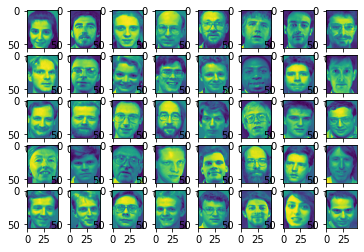

In [44]:
# define gender by hand, each value for 10 pictures
col_name = list(png_df.columns)
fig, ax = plt.subplots(5, 8)
genders = [0,1,1,1,1,1,1,1,
           1,1,0,1,1,1,1,1,
           1,1,1,1,1,1,1,1,
           0,1,1,1,1,1,1,1,
           1,1,1,1,1,1,0,1]
dic = {}          
k = 0
# insert all gender to new row
for i in col_name:    
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        #print(match.group(), k)
        plt.subplot(5,8,k+1)
        plt.imshow(png_df[i][0])
        k = k +1
    dic[i]=[genders[k-1]]
# add new row for png_df
#dic
#pd.DataFrame(dic)

df2 = pd.concat([png_df,pd.DataFrame(dic)]).reset_index(drop=True)

In [45]:
# flatten all pics data 
sample_df = df2.rename(index={0:'data',1:'gender'}).T
data_mat = np.array(np.ndarray.flatten(sample_df['data'][0]))
for i in range(1, len(sample_df)):
    data_mat = np.concatenate((data_mat,
         np.array(np.ndarray.flatten(sample_df['data'][i]))))
data_mat = data_mat.reshape(400,2576)
data_mat.shape

(400, 2576)

## Q1a the Ridge regression results

/usr/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=9.40137e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


Text(0.5, 1.0, 'MSE as a function of lambda')

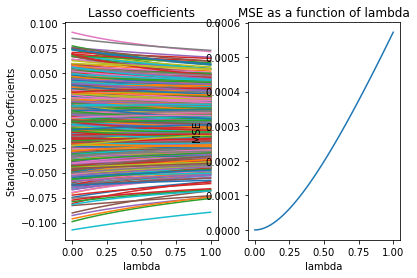

In [46]:
# Show chart how this looks like
alphas = np.linspace(0.00001,1,100)
ridge = Ridge(max_iter=10000)
coefs = []
mse = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(data_mat, sample_df['gender'])
    mse.append(np.mean((ridge.predict(data_mat)-sample_df['gender'])**2 ))
    coefs.append(ridge.coef_)

# ax = plt.gca()
plt.subplot(121)
plt.plot(alphas, coefs)
# ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients')

plt.subplot(122)
plt.plot(alphas, mse)
# ax.set_xscale('log')
# plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE as a function of lambda')

## Q1a LASSO results

Text(0.5, 1.0, 'MSE as a function of lambda')

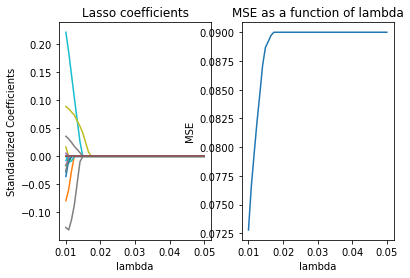

In [47]:
# Show chart how this looks like
alphas = np.linspace(0.01,0.05,50)
lasso = Lasso(max_iter=10000)
coefs = []
mse = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(data_mat, sample_df['gender'])
    mse.append(np.mean((lasso.predict(data_mat)-sample_df['gender'])**2 ))
    coefs.append(lasso.coef_)

# ax = plt.gca()
plt.subplot(121)
plt.plot(alphas, coefs)
# ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients')

plt.subplot(122)
plt.plot(alphas, mse)
# ax.set_xscale('log')
# plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE as a function of lambda')


The significant pixels are ( 11 , 32 )
The significant pixels are ( 22 , 4 )
The significant pixels are ( 23 , 4 )
The significant pixels are ( 27 , 27 )
The significant pixels are ( 29 , 5 )
The significant pixels are ( 31 , 43 )
The significant pixels are ( 37 , 19 )
The significant pixels are ( 49 , 0 )
The significant pixels are ( 49 , 13 )
The significant pixels are ( 49 , 16 )
The significant pixels are ( 54 , 3 )
The significant pixels are ( 54 , 4 )
The significant pixels are ( 55 , 17 )


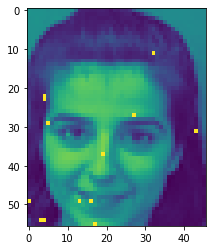

In [48]:
# use the min MSE
lasso_test = Lasso(alpha=alphas[np.argmin(mse)])

lasso_test.fit(data_mat, sample_df['gender'])
lasso_test.coef_
pixels = np.where(lasso_test.coef_ != 0)
plot_df = png_df.copy()

for i in pixels[0]:
    row = int(np.floor(i/np.matrix(sample_df['data'][0]).shape[1]) )
    col = i - row*np.matrix(sample_df['data'][0]).shape[1]
    print('The significant pixels are (',row, ',',col, ')')
    plot_df['ORL Faces/10_1.png'][0][row][col]=1

plt.imshow(plot_df['ORL Faces/10_1.png'][0])


## Q1b Stepwise regression results

The significant pixels are ( 3 , 18 )
The significant pixels are ( 4 , 40 )
The significant pixels are ( 25 , 40 )
The significant pixels are ( 31 , 43 )
The significant pixels are ( 43 , 5 )
The significant pixels are ( 46 , 0 )
The significant pixels are ( 47 , 20 )
The significant pixels are ( 48 , 13 )
The significant pixels are ( 52 , 7 )
The significant pixels are ( 53 , 11 )


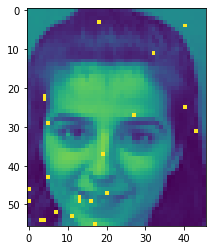

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

X = pd.DataFrame(data_mat,index=sample_df.index)       # predictor variable(s)
y = list(sample_df['gender'])         # response variable
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y)
plot_df = png_df.copy()
for i in sfs1.k_feature_names_:
    row = int(np.floor(i/np.matrix(sample_df['data'][0]).shape[1]) )
    col = i - row*np.matrix(sample_df['data'][0]).shape[1]
    print('The significant pixels are (',row, ',',col, ')')
    plot_df['ORL Faces/10_1.png'][0][row][col]=1

plt.imshow(plot_df['ORL Faces/10_1.png'][0])


## Q1 results comparisom
The stepwise and LASSO regression have some face features show they are signifigant. 

# Q2

In [50]:
# read data
col_names = ['Year','Capital','Labor', 'ValueAdded']
# read text file into pandas DataFrame
filename = "HW5_CCdata.txt"
# df = pd.read_fwf(,header=None,names = col_names,delimiter = "\s")
# df
ll = []
with io.open(filename, mode="r", encoding="utf-8") as f:  
    for line in f:
        # print(line.split())
        ll.append([float(i) for i in line.split()])
df = pd.DataFrame(ll,columns=col_names)
df

,Year,Capital,Labor,ValueAdded
0,72.0,1209188.0,1259142.0,11150.0
1,73.0,1330372.0,1371795.0,12853.6
2,74.0,1157371.0,1263084.0,10450.8
3,75.0,1070860.0,1118226.0,9318.3
4,76.0,1233475.0,1274345.0,12097.7
5,77.0,1355769.0,1369877.0,12844.8
6,78.0,1351667.0,1451595.0,13309.9
7,79.0,1326248.0,1328683.0,13402.3
8,80.0,1089545.0,1077207.0,8571.0
9,81.0,1111942.0,1056231.0,8739.7


## Q2a
Transformation:
$$
V_t=\alpha k_t^{\beta_1} L_t^{\beta_2} \eta_t \\
\Darr	\\
ln(V_t)=ln(\alpha)+ \beta_1 ln(k_t)+ \beta_2 ln(L_t)+ ln(\eta_t) \\
$$
Do linear regression to estimate $\beta_1$ and $\beta_2$

In [51]:
# using sklearn package
x = np.log(df.loc[:,['Capital', 'Labor']])
y = np.log(df.loc[:,'ValueAdded' ])
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_)
print('[B1 , B2] is: ', model.coef_)

R-square:  0.8183663535588693
beta_0 : -9.625933894388163
[B1 , B2] is:  [0.50565092 0.84546444]


## Q2b

When $\beta_1+\beta_2=1$,
$$
\begin{align*}
    ln(V_t) &=ln(\alpha)+ \beta_1 ln(k_t)+ \beta_2 ln(L_t)+ ln(\eta_t) \\
    &= ln(\alpha)+ \beta_1 ln(k_t)+(1-\beta_1)ln(L_t)+ ln(\eta_t) \\
    &= ln(\alpha)+ \beta_1 [ln(k_t) -ln(L_t)] + ln(L_t) + ln(\eta_t) \\ 
\end{align*} \\
$$


\begin{align*}
\therefore

    ln(\frac{V_t}{L_t}) 
    &= ln(\alpha)+ \beta_1 [ln(\frac{k_t}{L_t})] + ln(\eta_t) \\ 
\end{align*}

In [52]:
# using sklearn package
x = np.log(df.loc[:,'Capital']/df.loc[:,'Labor'] )
y = np.log(df.loc[:,'ValueAdded' ]/ df.loc[:,'Labor'])
x = x.to_numpy().reshape((-1,1))

model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_)
print('[B1 , B2] is: ', [model.coef_[0] , 1-model.coef_[0] ])

R-square:  3.643470119552017e-05
beta_0 : -4.712885451038345
[B1 , B2] is:  [0.009608932223409168, 0.9903910677765908]


# Q3

In [54]:
# Read Text Files with Pandas

col_names = ['mpg','cylinders','displacement','horsepower',
            'weight','acceleration','year','origin','car_name']
# read text file into pandas DataFrame
df = pd.read_fwf("auto-mpg.data.txt",header=None,names = col_names)
# df = pd.DataFrame(df1.to_numpy() , columns=col_names)
# display DataFrame
df = df[~df.isin({'?'}).any(1)]
print(df)


      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0      130.0  3504.0          12.0    70   
1    15.0          8         350.0      165.0  3693.0          11.5    70   
2    18.0          8         318.0      150.0  3436.0          11.0    70   
3    16.0          8         304.0      150.0  3433.0          12.0    70   
4    17.0          8         302.0      140.0  3449.0          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
393  27.0          4         140.0      86.00  2790.0          15.6    82   
394  44.0          4          97.0      52.00  2130.0          24.6    82   
395  32.0          4         135.0      84.00  2295.0          11.6    82   
396  28.0          4         120.0      79.00  2625.0          18.6    82   
397  31.0          4         119.0      82.00  2720.0          19.4    82   

     origin                     car_name  
0         1  "chevrolet chevelle

In [55]:
# define main PCA function

def myPCA(m , isCorrMx = False ) :
    m_bar = np.mean(m.T,axis=1)
    # print([float(i) for i in m_bar])
    Center_mat = m - [float(i) for i in m_bar]
    # print(Center_mat)

    if isCorrMx:
        V = np.corrcoef(m.T)
    else:
        V = np.cov(m.T)
    eig_value, eig_vector = np.linalg.eig(V)
    result = eig_vector.T.dot(Center_mat.T).T
    # print('Eigen value :',eig_value)
    # print('Eigen vector :',eig_vector)
    # print('PCA results :', result )
    return result , eig_value , eig_vector

In [56]:
def show_PCA_chart( eig_value):
    
    x = ['PC'+str(i) for i in range(1,len(eig_value)+1) ]
    total_Var = sum(eig_value)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel('PCs')
    ax1.set_ylabel('Cumulative percentage(%)', color=color)
    ax1.bar(x, eig_value/total_Var*100, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    cum_Var = []
    tmp = 0
    for i in eig_value:
        tmp +=i
        cum_Var.append(tmp)
    
    color = 'tab:red'
    ax2.set_ylabel('Cumulative Variance', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, cum_Var, '-*', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

## Q3a results
In AutoMPG data, We should use correlation matirx rathere than covariance matrix.
Because we found 'cylinders','displacement','horsepower' and 'weight' are correlated factors.

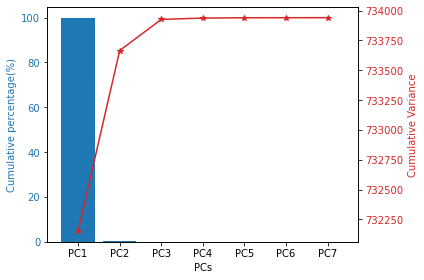

PCA results : [ 7.27595761e-12  2.72848411e-12 -1.70530257e-12  1.93267624e-12
  1.27897692e-13  2.13162821e-14  4.32986980e-14]


In [57]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
result , eig_value , eig_vector = myPCA(m, isCorrMx = False)
show_PCA_chart( eig_value)
print('PCA results :', np.sum(result,axis=0) )

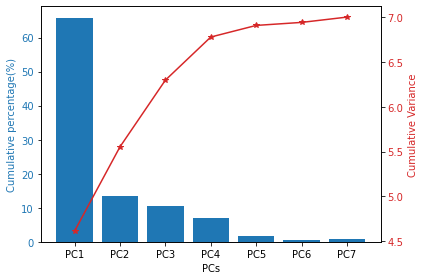

Eigen value : [4.61205914 0.94003231 0.7441651  0.4813097  0.12956905 0.0337052
 0.05915951]
PCA results : [ 3.63797881e-12 -1.81898940e-12  2.10320650e-12  7.27595761e-12
 -3.63797881e-12  9.09494702e-13 -7.27595761e-12]


In [58]:
m = df.loc[:,['cylinders','displacement','horsepower',
            'weight','acceleration','year','origin']].astype(float).to_numpy()
result , eig_value , eig_vector = myPCA(m, isCorrMx = True)
show_PCA_chart( eig_value)
print('Eigen value :',eig_value)
print('PCA results :', np.sum(result,axis=0) )

## Q3b
The PCA is scale-varant because if some factors correlated. 
It will lead to one or few factrs becomes high Eigenvalues means the first few PCA is large. 
The model need to standardise which use correlation matrix in order to facilitate PCA.

# Q4

## Q4a result

In [59]:
# do data transpose
m = data_mat.T
m.shape

(2576, 400)

In [60]:
result , eig_value , eig_vector = myPCA(m, isCorrMx = False)


In [61]:
total_Var = sum(eig_value)
print('The total variance is ', total_Var)
cum_Var = []
tmp = 0
for i in eig_value:
    tmp +=i
    cum_Var.append(tmp)
np.where(cum_Var/total_Var>.5)[0][0]
for i in range(5,10):
    index = np.where(cum_Var/total_Var>i/10)[0][0] # return 1st index 
    output = cum_Var[index]
    print('The PC',i,': the cumulative variance is ', round(output, 2 ),'. The percentage is ', round(output/total_Var*100,1),'%')

The total variance is  13.594727653440655
The PC 5 : the cumulative variance is  7.74 . The percentage is  57.0 %
The PC 6 : the cumulative variance is  8.36 . The percentage is  61.5 %
The PC 7 : the cumulative variance is  9.59 . The percentage is  70.5 %
The PC 8 : the cumulative variance is  10.91 . The percentage is  80.2 %
The PC 9 : the cumulative variance is  12.25 . The percentage is  90.1 %


## Q4b result

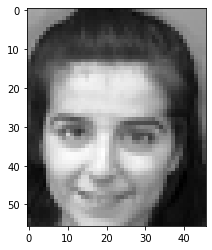

In [65]:
# from the previouse results , PC9 is good enought

m_bar = np.mean(m.T,axis=1)
Center_mat = m - [float(i) for i in m_bar]

# extract 90% variance eigenvector. Choice first r component
r = 9
update_eig_vector = np.zeros_like(eig_vector)
update_eig_vector[:,:r] = eig_vector[:,:r]

# PCA reverse transformation
pic_PCA = m.dot(update_eig_vector.T)+ Center_mat 
PC1_pic = pic_PCA.T[0]
plt.imshow(PC1_pic.reshape(56,46),cmap='gray')



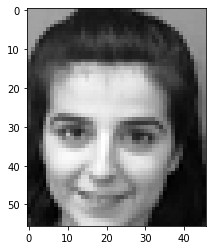

In [63]:
# original pic
plt.imshow(data_mat[0].reshape(56,46),cmap='gray')